In [33]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# loading the dataset
df = pd.read_csv("C:/Users/USER/Desktop/Abbie's World/My project/1_Hotel Booking Demand Project/1_with_Excel/hotel_booking_cleaned.csv")

In [35]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   cancelled_status                87396 non-null  object 
 3   lead_time                       87396 non-null  int64  
 4   arrival_date_year               87396 non-null  int64  
 5   arrival_date_month              87396 non-null  object 
 6   arrival_date_week_number        87396 non-null  int64  
 7   arrival_date_day_of_month       87396 non-null  int64  
 8   stays_in_weekend_nights         87396 non-null  int64  
 9   stays_in_week_nights            87396 non-null  int64  
 10  adults                          87396 non-null  int64  
 11  children                        87396 non-null  int64  
 12  babies                          

In [36]:
df.sample(5)

,hotel,is_canceled,cancelled_status,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,total_guest,meal,country,market_segment,distribution_channel,is_repeated_guest,repeated_status,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,days_waiting_grouping,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
13965,Resort Hotel,0,Not Cancelled,188,2015,October,43,20,2,5,2,0,0,2,BB,GBR,Offline TA/TO,TA/TO,0,First-time Guest,0,0,E,E,0,No Deposit,143,0,0,0 days,Contract,57.6,0,0,Check-Out,27/10/2015
55871,City Hotel,0,Not Cancelled,61,2015,November,48,23,1,3,1,0,0,1,BB,PRT,Groups,TA/TO,0,First-time Guest,0,0,A,A,0,No Deposit,37,0,0,0 days,Transient-Party,70.0,0,0,Check-Out,27/11/2015
15307,Resort Hotel,0,Not Cancelled,29,2015,December,52,26,0,1,2,0,0,2,BB,PRT,Offline TA/TO,TA/TO,0,First-time Guest,0,0,D,D,0,No Deposit,171,0,0,0 days,Transient,37.0,0,0,Check-Out,27/12/2015
79073,City Hotel,0,Not Cancelled,82,2017,April,15,9,2,1,2,0,0,2,BB,FRA,Offline TA/TO,TA/TO,0,First-time Guest,0,0,A,D,0,No Deposit,28,0,0,0 days,Transient,85.0,0,0,Check-Out,12/04/2017
60356,City Hotel,0,Not Cancelled,90,2016,April,16,11,1,0,2,0,0,2,BB,FRA,Online TA,TA/TO,0,First-time Guest,0,0,D,E,0,No Deposit,9,0,0,0 days,Transient,105.3,0,1,Check-Out,12/04/2016


In [37]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [38]:
# data cleaning and preprocessing
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y')

# Creating a new 'arrival_date' column
df['arrival_date'] = pd.to_datetime(
    df[['arrival_date_year',
        'arrival_date_month',
        'arrival_date_day_of_month']]
        .astype(str).agg('-'.join, axis=1))

In [39]:
# data overview
pd.set_option('display.max_columns', None)

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,total_guest,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396,87396
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,2.025253,0.039075,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567,2016-08-31 03:44:08.963339520,2016-09-15 00:20:26.857064448
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00,2015-07-01 00:00:00
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000,2016-03-18 00:00:00,2016-04-01 00:00:00
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000,2016-09-08 00:00:00,2016-09-20 00:00:00
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000,2017-03-05 00:00:00,2017-04-01 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,55.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00,2017-08-31 00:00:00
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.794319,0.193775,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946,NaN,NaN


In [45]:
# Removing entries with negative adr
df_filtered = df[df['adr'] >= 0].copy()

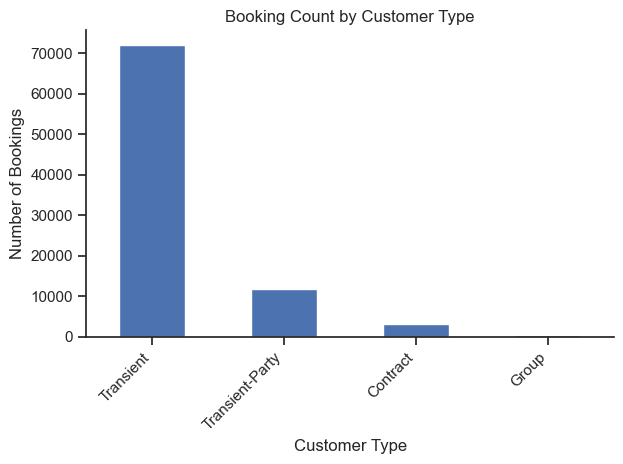

In [41]:
booking_count = df_filtered['customer_type'].value_counts()

booking_count.plot(kind='bar')
sns.despine()
plt.title('Booking Count by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

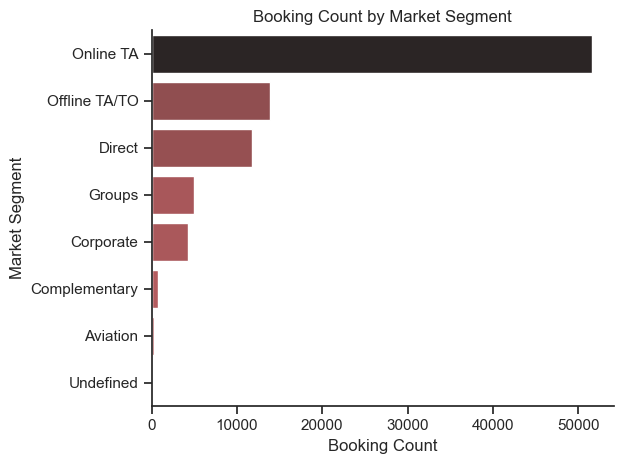

In [42]:
df_plot = df_filtered['market_segment'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data= df_plot,x='count', y='market_segment', hue='count', palette='dark:r_r', legend=False)
sns.despine()
plt.title('Booking Count by Market Segment')
plt.xlabel('Booking Count')
plt.ylabel('Market Segment')

plt.tight_layout()
plt.show()

### Customer Behavior Chart

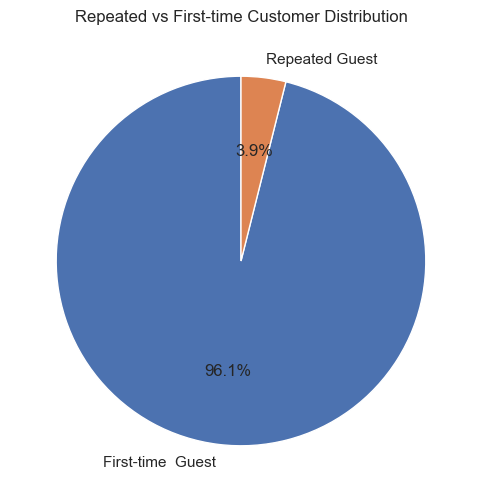

In [43]:
counts_plot = df_filtered['repeated_status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    counts_plot, 
    labels=counts_plot.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Repeated vs First-time Customer Distribution')
plt.show()


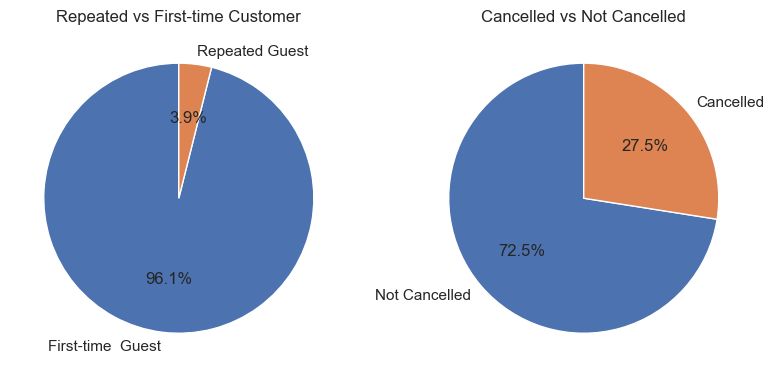

In [44]:
counts_repeated = df_filtered['repeated_status'].value_counts()
counts_cancelled = df_filtered['cancelled_status'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(8,4))

# Repeated_status
axes[0].pie(
    counts_repeated, 
    labels=counts_repeated.index, 
    autopct='%1.1f%%', 
    startangle=90
)
axes[0].set_title('Repeated vs First-time Customer')

# Cancelled_status
axes[1].pie(
    counts_cancelled, 
    labels=counts_cancelled.index, 
    autopct='%1.1f%%', 
    startangle=90
)
axes[1].set_title('Cancelled vs Not Cancelled')


plt.tight_layout()
plt.show()
